# Módulo de Preprocesamiento I (Ejercicios Prácticos)

> Ejemplos generales de preprocesamiento de datos en python



# Importar y Exportar Datasets (Sesión mañana)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Importar y Exportar datos con PANDAS

In [1]:
import pandas as pd # Importar la librería Pandas

In [2]:
df = pd.read_csv("glass.csv", sep=",") # Importar del archivo de datos y guardarlo en un DATAFRAME
print (df.head(4))                     # Muestra los cuatro pimeros regist
df.to_csv("glass_2.0.csv")             # Exportar el archivo de datos

        Ri     Na    Mg    Al     Si     K    Ca   Ba   Fe                Type
0  1.51793  12.79  3.50  1.12  73.03  0.64  8.77  0.0  0.0  'build wind float'
1  1.51643  12.16  3.52  1.35  72.89  0.57  8.53  0.0  0.0  'vehic wind float'
2  1.51793  13.21  3.48  1.41  72.64  0.59  8.43  0.0  0.0  'build wind float'
3  1.51299  14.40  1.74  1.54  74.55  0.00  7.59  0.0  0.0           tableware


Visualización

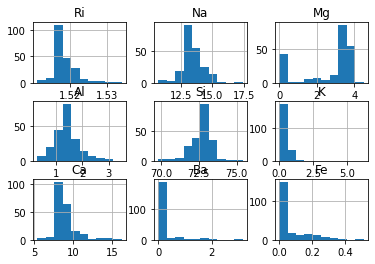

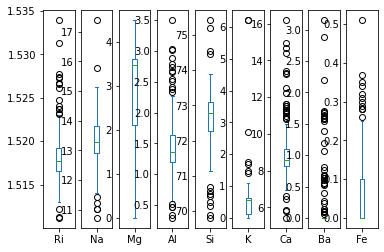

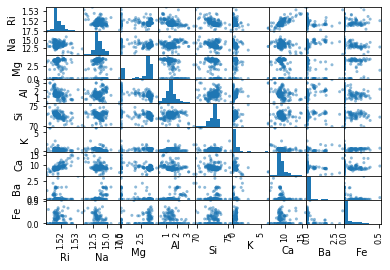

In [ ]:
import matplotlib.pyplot as plt

# Histogram
df.hist()

# Box Plot
df.plot(kind='box', subplots=True, sharex=False, sharey=False)

# Scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

Manipulación de DataFrames

In [ ]:
print (df)
df.drop(['Ba'], axis=1, inplace=True)       # Eliminar una columna (atributo)
df.drop([1], axis=0, inplace=True)          # Eliminar una fila (instancia)
df.drop(range(2, 8, 2), axis=0, inplace=True) # Se puede utilizar range, eliminar desde 1 hasta 6, eliminado en pasos de 2
print (df)

# Normalizar datos con SKLEARN

In [3]:
# Importar las transformaciones necesarias
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import numpy as np

In [9]:
# Definir las transformaciones a realizar
Na_array = np.array(df['Na']).reshape(-1,1)
scalerMinMax = MinMaxScaler(feature_range=(0,1))
scalerStandard = StandardScaler()

# Transformar
Na_scaled_MinMax = scalerMinMax.fit_transform(Na_array)     # Normalizar columna Na con MinMax (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
Na_scaled_Standard = scalerStandard.fit_transform(Na_array) # Normalizar columna Na con StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Na_scaled_Norm = normalize(Na_array,axis=0)                 # Normalizar columna Na con Normalizer (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]= sc_X.fit_transform(dataset[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])


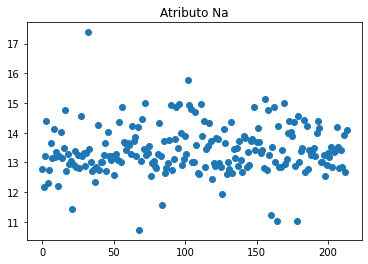

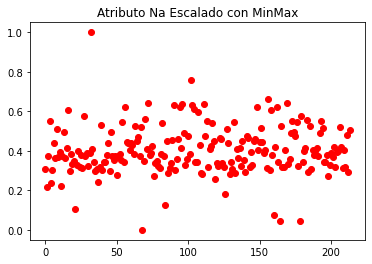

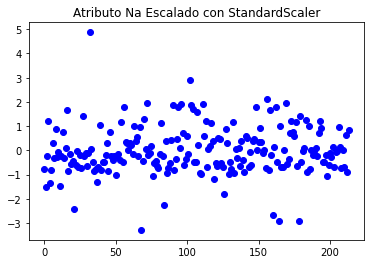

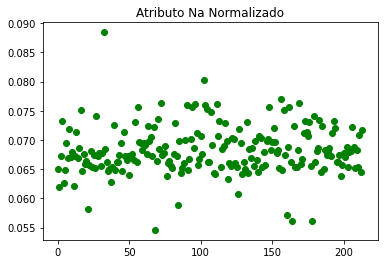

In [8]:
import matplotlib.pyplot as plt  # Gráfica para mostrar las transformaciones (Visualización)

plt.figure(1)
plt.plot(Na_array,'o')
plt.title('Atributo Na')
plt.figure(2)
plt.plot(Na_scaled_MinMax,'ro')
plt.title('Atributo Na Escalado con MinMax')
plt.figure(3)
plt.plot(Na_scaled_Standard,'bo')
plt.title('Atributo Na Escalado con StandardScaler')
plt.figure(4)
plt.plot(Na_scaled_Norm,'go')
plt.title('Atributo Na Normalizado')
plt.show()

# Distancia entre textos (Limpieza)

In [ ]:
# Instalar e importar módulos para distancias
!pip install textdistance
import textdistance

In [ ]:
textdistance.hamming.distance('casado', 'csado')

5

In [ ]:
textdistance.levenshtein.distance('casado', 'csado')

1

# Discretización o Estandarización

In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
#definir las transformaciones a realizar
kbins_equal_width = sklearn.preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
kbins_equal_features = sklearn.preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

#transformar
Kbeans_E_W = kbins_equal_width.fit_transform(Na_array)
Kbeans_E_F = kbins_equal_features.fit_transform(Na_array)

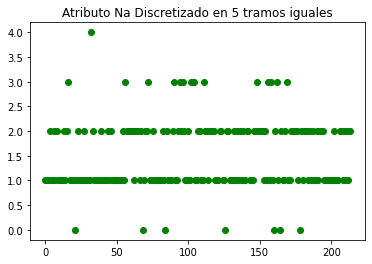

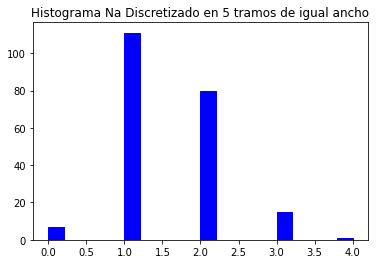

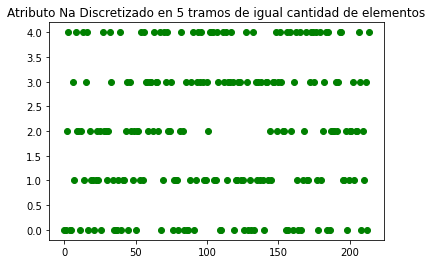

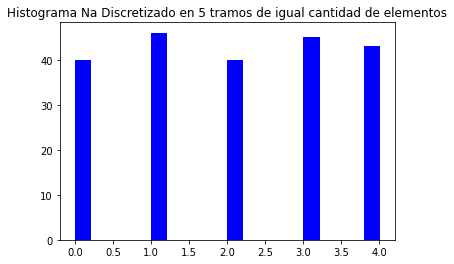

In [ ]:
plt.figure(1)      # Gráfica para mostrar las transformaciones
plt.plot(Kbeans_E_W,'go')
plt.title('Atributo Na Discretizado en 5 tramos iguales')
plt.figure(2)
plt.hist(Kbeans_E_W, bins=20, align='mid', color='b', edgecolor='b')
plt.title('Histograma Na Discretizado en 5 tramos de igual ancho')
plt.figure(3)
plt.plot(Kbeans_E_F,'go')
plt.title('Atributo Na Discretizado en 5 tramos de igual cantidad de elementos')
plt.figure(4)
plt.hist(Kbeans_E_F, bins=20, align='mid', color='b', edgecolor='b')
plt.title('Histograma Na Discretizado en 5 tramos de igual cantidad de elementos')
plt.show()